In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [3]:
import requests, json
import torch
import torchvision
from torchvision.io import read_video
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models.detection import fasterrcnn_resnet50_fpn#, FasterRCNN_ResNet50_FPN_Weights
import itertools
import matplotlib.patches as patches
from ipywidgets import interact
import ipywidgets as widgets

# Load Data JSON

In [4]:
backend = requests.get("https://backend.kaimerra.com/feed")
#backend = requests.get("http://10.0.3.254:3001/feed")
feed = backend.json()

In [5]:
feed[-1]

{'_id': '62548fb21a2594ec2ebd3040',
 'video_url': 'https://kaimerra-static.storage.googleapis.com/vids/0b13032c-c91b-4dbe-98ff-31d1cb81d3e8-vid.mp4',
 'thumbnail_url': 'https://kaimerra-static.storage.googleapis.com/vids/0b13032c-c91b-4dbe-98ff-31d1cb81d3e8-thumbnail.jpeg',
 'name': 'You can forge fish apparently',
 'userId': '6253804a6a8816363dd32e37',
 'date': '2022-04-11T20:29:38.678Z',
 'height': 720,
 'width': 1270,
 'userName': 'sallywink89@gmail.com',
 'duration': '6.030000',
 'likes': 1,
 'dislikes': 0}

In [6]:
z = [f for f in feed if 'userName' in f and 'mason' in f['userName']]

In [7]:
z = feed[-1]

In [8]:
#Download latest video, save to file
#url = z['video_url']
#r = requests.get(url, allow_redirects=True)

#with open('kaimerra_vid.mkv', 'wb') as f:
#    f.write(r.content)

In [9]:
z

{'_id': '62548fb21a2594ec2ebd3040',
 'video_url': 'https://kaimerra-static.storage.googleapis.com/vids/0b13032c-c91b-4dbe-98ff-31d1cb81d3e8-vid.mp4',
 'thumbnail_url': 'https://kaimerra-static.storage.googleapis.com/vids/0b13032c-c91b-4dbe-98ff-31d1cb81d3e8-thumbnail.jpeg',
 'name': 'You can forge fish apparently',
 'userId': '6253804a6a8816363dd32e37',
 'date': '2022-04-11T20:29:38.678Z',
 'height': 720,
 'width': 1270,
 'userName': 'sallywink89@gmail.com',
 'duration': '6.030000',
 'likes': 1,
 'dislikes': 0}

In [10]:
#r = torchvision.io.VideoReader('kaimerra_vid.mkv', 'video', num_threads=1)
#for d in r:
#    break

In [11]:
#model = torchvision.models.detection.ssd300_vgg16(pretrained = True, progress=False).eval()
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).eval()

In [12]:
from kaigeo import detect
#624df2b8b3c629a0332e53ab
objs = detect.detect_for_api("62548fb21a2594ec2ebd3040", model, 'output2.mp4')

writing
writing
writing
writing
writing
writing
writing
writing
writing
writing


In [14]:
objs

[{'frameImageData': {'width': 240.0,
   'height': 320.0,
   'data': 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAIAAAD+Tyo8AAEAAElEQVR4nNz9abBlx3kYCH5fZp7lLu++tfYFS2EhAUIACUqmRNK0qYWWZFE226KnLTnGbjmmwz3t7pnpmJj2eBwT4e4fbkeHt3DPL7c96omwPaJlyaREiWrJokQKFBeYIECsBaCqUOurt9/1LJnfNz++c/Lm3V7VKxRI9mRUvLrvvHPz5Mn89hUbySoiAsDUT601ADjnoB5yBZwmIm1QKQVgi6JwVCJiHMcAgKAREcAwMzkgIooR5g1rrTxLKTX79KmfSikimjsPM8+dh5nlBuecfDbGaK2ZkJmJyF/3XyEimS2KIpnBOVfOfWr9uNlBbv51WarML4/QWmutwYEsRtYjf1VKFUWhlJI1y0WZoXBWa22MAQAi8mv2j5DZEFG+a8ktWs/cobFBRIBkjDGRbIsty9LaQiklu2QtAYAxcRRFtsixHn6piJjnuex5URREpLUWWCoKy8yIrLVOkiSOY2OU3F+WZWlzZpadkQ0mqvbNH5Yfc9dvrZV1+m/JfiqlZHOmploEV7LacB7ZWDDa3yMnjQxQw4MGRER2ZK11zhFRgwHGMKb9Z0IAAEYAAOIxzJCysrzZn3OHOfw4DxmIyDze0BCM/A1KKYKFz36vx1zk90sNVzv1OXyXRYDyXo9whbKTAEBEs+sJKd27H7Owcgj0HDI82giSyE/5VWad+yJKqZBnHGmds7Pd28pn5/GPQ8RFM07BjECdHKGnIyGzIZ5POI46jozAjME/ISEKAZERAAERAREAgaH++X1DYKi3chYnw6Odi6ueTn+/hizbM2RZm9Yayc1Sn5ADT3MnXigRzB9YzUNEMtk9r19rHUVRWZYQ7Gc9IU6tPHzfRbTVf+UQ5JzlKIew68PHu6GJ/uAIJvAfEbX

In [ ]:
from kaigeo import detect
kaigeo.detect_for_api

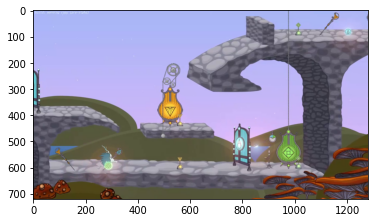

In [28]:
plt.imshow(objs[7]['frameImageData']['data'].permute(1, 2, 0))

In [24]:
objs[7]['x'], objs[7]['width'],

objs[7]['y'], objs[7]['height'],


(388.26193, 15.233612)

(<matplotlib.image.AxesImage at 0x7efd32e7c040>, 'book', 0.7558116912841797)

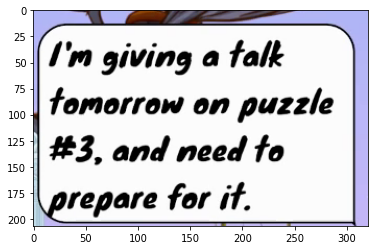

In [35]:
plt.imshow(objs[o]['extractedImageData']['data'].permute(1, 2, 0).detach().numpy()), objs[5]['category'], objs[7]['score']

In [ ]:
#Load video as torch tensor
reader = torchvision.io.VideoReader('kaimerra_vid', "video")
output = []
#reader.seek(2)
for frame in reader:#itertools.takewhile(lambda x: x['pts'] <= 5, reader.seek(0)):
    output.append(frame['data'])

frames = torch.stack(output, dim=0)

In [ ]:
reader.get_metadata()

In [2]:
def plot_frame(Frame):
    plt.imshow(frames[Frame].permute(1,2,0))
    
interact(plot_frame, Frame=widgets.IntSlider(min=0, max=len(frames) - 1, step=1,value=0))


NameError: name 'interact' is not defined

In [ ]:
# %matplotlib widget

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.animation as animation

# fig = plt.figure(figsize = (10,5))
# ani_frames = [] # for storing the generated images
# # fig, ax = plt.subplots(1,2)
# for i in range(len(frames)):
#     ani_frames.append([plt.imshow(frames[i].permute(1,2,0).numpy(), cmap=cm.Greys_r,animated=True)])
    

# ani = animation.ArtistAnimation(fig, ani_frames, interval=30, blit=True,
#                                 repeat_delay=0)
# # ani.save('movie.mp4')
# plt.show()


In [ ]:
from torchvision.transforms.functional import convert_image_dtype


# model = fasterrcnn_resnet50_fpn(pretrained = True, progress=False)
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained = True, progress=False)
# model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained = True, progress=False)

# imgs = convert_image_dtype(frames,dtype=torch.float)

model = model.eval()

CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# outputs = model(frames.float()/255)

In [ ]:
from tqdm import tqdm

def get_box(box):
    x = box[0]
    y = box[1]
    width = box[2] - box[0]
    height = box[3] - box[1]
    return x,y,width,height

def get_extracted_frame(frame,box):
    # return frame[:, int(box[0]) : int(box[2]), int(box[1]) : int(box[2])]
    return frame[:, int(box[0]) : int(box[2]), int(box[1]) : int(box[3])]

def get_annotations(frames,top = 'all'):
    annotations={'frame_idx':[],
                 'frame':[],
                 'extracted_frame':[],
                 'category':[], 
                 'score': [], 
                 'x':[],
                 'y': [], 
                 'width': [], 
                 'height': []}
    
    for frame_idx,frame in enumerate(tqdm(frames)):
        outputs = model(frame.unsqueeze(0).float()/255)[0]
        labels = [CATEGORY_NAMES[idx] for idx in outputs['labels']]

        for object_idx, label in enumerate(labels):
            box = outputs['boxes'][object_idx].detach().numpy()
            x,y,width,height = get_box(box)
            
            annotations['frame_idx'].append(frame_idx)
            annotations['frame'].append(frames[frame_idx])
            annotations['extracted_frame'].append(get_extracted_frame(frames[frame_idx], box))
            annotations['category'].append(label)
            annotations['score'].append(float(outputs['scores'][object_idx].detach()))
            annotations['x'].append(x)
            annotations['y'].append(y)
            annotations['width'].append(width)
            annotations['height'].append(height)
            
    if top == 'all':
        return annotations
    
    elif isinstance(top,int):
        top_indices = np.argpartition(annotations['score'], -top)[-top:]
        annotations_top = {'frame_idx':[annotations['frame_idx'][idx] for idx in top_indices],
                           'frame':[annotations['frame'][idx] for idx in top_indices],
                           'extracted_frame':[annotations['extracted_frame'][idx] for idx in top_indices],
                           'category':[annotations['category'][idx] for idx in top_indices], 
                           'score': [annotations['score'][idx] for idx in top_indices], 
                           'x':[annotations['x'][idx] for idx in top_indices], 
                           'y': [annotations['y'][idx] for idx in top_indices], 
                           'width': [annotations['width'][idx] for idx in top_indices], 
                           'height': [annotations['height'][idx] for idx in top_indices]}

        return annotations_top


In [ ]:
annotations = get_annotations(frames, top = 10)

In [ ]:
plt.imshow(annotations['extracted_frame'][0].permute(1,2,0))

In [ ]:
fig, ax = plt.subplots(len(annotations['frame_idx']),figsize = (10,10 * len(annotations['frame_idx'])))

for frame_idx,frame in enumerate(annotations['frame_idx']):
    ax[frame_idx].imshow(frames[frame].permute(1,2,0))
    
    # xy, width, height = get_box(annotations['Bounding Box'][frame_idx])
    rectangle = patches.Rectangle(xy = [annotations['x'][frame_idx],annotations['y'][frame_idx]],
                                  width = annotations['width'][frame_idx],
                                  height = annotations['height'][frame_idx],
                                  linewidth=3, edgecolor='r', facecolor='none')
    ax[frame_idx].add_patch(rectangle)
    # ax[frame_idx].set_title(annotations['category'][frame_idx])
    ax[frame_idx].text(annotations['x'][frame_idx], annotations['y'][frame_idx]-30, annotations['category'][frame_idx], color='red', bbox=dict(facecolor='white', edgecolor='red'))

In [ ]:
len(frames)

In [ ]:
frame = frames[33]

In [ ]:
frame_snippet = frame[:,12:1270,20:709]

In [ ]:
plt.imshow(frame_snippet.permute(1,2,0))

In [ ]:
outputs['boxes'][0].detach().numpy()

In [ ]:
outputs = sum([model(five_frames.float()/255) for five_frames in chunker(frames,5)],0)

In [ ]:
score_threshold = 0.6

# label_idxs = [[label for label in output['labels'][(output['scores'] > score_threshold).nonzero()]]for output in outputs]
# labels = [[CATEGORY_NAMES[idx] for idx in label_idx] for label_idx in label_idxs]
# boxes = [[box[0] for box in output['boxes'][(output['scores'] > score_threshold).nonzero()]]for output in outputs]

# score_indices = np.arange(0,5) #The scores are listed in order, so the 0th score was the top scoring bounding box
# label_idxs = [[output['labels'][score_idx] for output in outputs] for score_idx in score_indices]
# labels = [[CATEGORY_NAMES[idx] for idx in label_idx] for label_idx in label_idxs]
# boxes = [[output['boxes'][score_idx] for output in outputs] for score_idx in score_indices]

def get_box(box):
    xy = box[0:2]
    width = box[2] - box[0]
    height = box[3] - box[1]
    return xy.detach().numpy(), width.detach().numpy(), height.detach().numpy()
    
fig, ax = plt.subplots(2,figsize = (10,10 * len(outputs)))
for frame_idx,frame in enumerate(frames):
    ax[frame_idx].imshow(frame.permute(1,2,0))
    
    for box_idx,box in enumerate(boxes[frame_idx]):
        xy, width, height = get_box(box)
        rectangle = patches.Rectangle(xy = xy,
                                      width = width,
                                      height = height,
                                      linewidth=3, edgecolor='r', facecolor='none')
        ax[frame_idx].add_patch(rectangle)
        # ax[idx].set_title(labels[idx])
        ax[frame_idx].text(xy[0], xy[1]-30, labels[frame_idx][box_idx], color='red', 
        bbox=dict(facecolor='white', edgecolor='red'))